## Cross shelf fluxes

This notebook is a first look at the model's diffusive and advective fluxes form the diagnostics package.
Frequency of output is 43200 s (half a day) and the size of the fields is 360x360x90x20.

Filename: Flux_TH (Theta), Flux_SLT (salinity)

| Variable   |   Units         | Description  | Coordinates  | Size                  |
|------------|:---------------:|-------------:|:-------------|:---------------------:|:--------------------------:
| ADVr_TH     | $^{\circ}C m^3s^{-1}$ | Vertical Advective Flux of Pot.Temperature|(T, Z, Y, X) | (16,90,360,360)
| ADVx_TH     | $^{\circ}C m^3s^{-1}$ | Zonal Advective Flux of Pot.Temperature | (T, Z, Y, Xp1) | (16,90,360,361)
| ADVy_TH     | $^{\circ}C m^3s^{-1}$ | Meridional Advective Flux of Pot.Temperature|(T, Z, Yp1, X) | (16,90,361,360)
| DFrE_TH     | $^{\circ}C m^3s^{-1}$ | Vertical Diffusive Flux of Pot.Temperature (Explicit part)|(T, Z, Y, X) | (16,90,360,360)
| DFxE_TH     | $^{\circ}C m^3s^{-1}$ | Zonal      Diffusive Flux of Pot.Temperature|(T, Z, Y, Xp1) | (16,90,360,361)
| DFyE_TH     | $^{\circ}C m^3s^{-1}$ | Meridional Diffusive Flux of Pot.Temperature|(T, Z, Yp1, X) | (16,90,361,360)
| DFrI_TH     | $^{\circ}C m^3s^{-1}$ | Vertical Diffusive Flux of Pot.Temperature (Implicit part)|(T, Z, Y, X) | (16,90,360,360)   

Same for salinity.

For passive tracers, there are 3 extra fields besides these fluxes. Units correspond to what I entered as units in data.ptracers but it really doesn't matter.

Filename: FluxTR01, FluxTr02 

| Variable    |   Units                       | Description  | Coordinates           | Size                      |
|------------ |:----------------------------: |:-------------|:---------------------:|:--------------------------:
| UTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$   |Zonal Mass-Weighted Transp of Tr01   | (T, Z, Y, Xp1) | (16,90,360,361)
| VTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$   |Meridional Mass-Weighted Transp of Tr01|(T, Z, Yp1, X) | (16,90,361,360)
| WTRAC01     |  $Mol\ l^{-1}\cdot ms^{-1}$   |Vertical Mass-Weighted Transp of Tr01|(T, Z, Y, X) | (16,90,360,360)
| ADVrTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ |Vertical Advective Flux of Tr01|(T, Z, Y, X) | (16,90,360,360)
| ADVxTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ |Zonal Advective Flux of Tr01 |(T, Z, Y, Xp1) | (16,90,360,361)
| ADVyTr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ |Meridional Advective Flux of Tr01|(T, Z, Yp1, X) | (16,90,361,360)
| DFrETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ |Vertical Diffusive Flux of Tr01 (Explicit part)|(T, Z, Y, X)| (16,90,360,360)
| DFxETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ | Zonal      Diffusive Flux of Tr01|(T, Z, Y, Xp1) | (16,90,360,361)
| DFyETr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ | Meridional Diffusive Flux of Tr01|(T, Z, Yp1, X) | (16,90,361,360)
| DFrITr01    |  $Mol\ l^{-1}\cdot m^3s^{-1}$ | Vertical Diffusive Flux of Tr01 (Implicit part)| (T, Z, Y, X) | (16,90,360,360) 
 


In [1]:
#import gsw as sw # Gibbs seawater package

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('notebook')

In [4]:
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)
CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

#FluxTH = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTHGlob.nc'
#FluxSLT = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxSLTGlob.nc'
FluxTR01 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR01Glob.nc'
FluxTR02 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR02Glob.nc'
FluxOut = Dataset(FluxTR02)


In [69]:
NoCCanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
NoCCanyonGridOut = Dataset(CanyonGrid)
NoCCanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/stateGlob.nc'
NoCCanyonStateOut = Dataset(CanyonState)

#FluxTH = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTHGlob.nc'
#FluxSLT = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxSLTGlob.nc'
NoCFluxTR01 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/FluxTR01Glob.nc'
NoCFluxTR02 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/FluxTR02Glob.nc'
NoCFluxOut = Dataset(FluxTR02)


In [5]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Times = CanyonStateOut.variables['T']
TimesFlux = FluxOut.variables['T']

#print(TimesFlux[:])
xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells (Y,X)
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells (Y,X)

xp1 = rout.getField(CanyonGrid, 'XG') # x coords vorticity cells (Yp1,Xp1)
yp1 = rout.getField(CanyonGrid, 'YG') # y coords vorticity cells (Yp1,Xp1)

drF = CanyonGridOut.variables['drF'] # vertical distance between faces
dxG = rout.getField(CanyonGrid,'dxG')
bathy = rout.getField(CanyonGrid, 'Depth')

rA = rout.getField(CanyonGrid, 'rA') # area of cells (x-y)

hFacC = rout.getField(CanyonGrid, 'HFacC') # (Z,Y,X) for vertical fluxes
MaskC = rout.getMask(CanyonGrid,'HFacC') 


See notebook TransportThroughBoxes.ipynb for definitions of the planes.

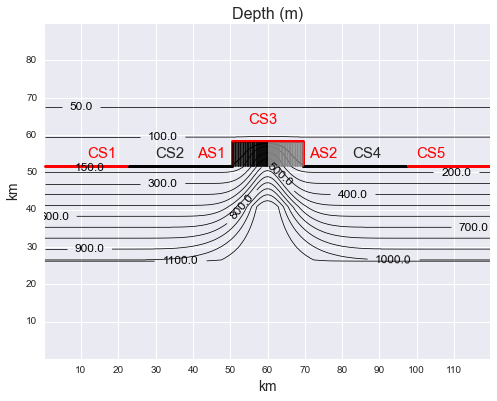

In [53]:
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(8,6))

### Across-Shelf walls ###


# UPS2

plt.plot(xc[227:262,120],yc[227:262,120],'-', linewidth=3, linestyle='-', color='red')

# DWS1

plt.plot(xc[227:262,240],yc[227:262,240],'-',linewidth=3, linestyle='-', color='red' )


### Along Shelf walls ###

# ACS1 
plt.plot(xc[227,:40],yc[227,:40],'-',linewidth=3, linestyle='-', color='red' )

# ACS2
plt.plot(xc[227,40:120],yc[227,40:120],'-', linewidth=3, linestyle='-', color='0.0')

# ACS3
plt.plot(xc[262,120:240],yc[262,120:240],'-',linewidth=3, linestyle='-', color='red' )

# ACS4
plt.plot(xc[227,240:320],yc[227,240:320],'-',linewidth=3, linestyle='-', color='0.0' )

# ACS5
plt.plot(xc[227,320:360],yc[227,320:360],'-',linewidth=3, linestyle='-', color='red' )

#LID1
plt.plot(xc[227:262,120:180],yc[227:262,120:180],linewidth=0.75, linestyle='-', color='0.0')

#LID2
plt.plot(xc[227:262,180:240],yc[227:262,180:240],linewidth=0.75, linestyle='-', color='0.5')

lev = range(200,1200,100)

levels = [50,100,150]+lev

CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[0.75,0.75,1,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=12)



plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)
plt.annotate('CS1', xy=(12000, 54000), xytext=(12000, 54000),color='r')
plt.annotate('CS2', xy=(30000, 54000), xytext=(30000, 54000))
plt.annotate('CS3', xy=(55000, 63000), xytext=(55000, 63000),color='r')
plt.annotate('CS4', xy=(83000, 54000), xytext=(83000, 54000))
plt.annotate('CS5', xy=(100000, 54000), xytext=(100000, 54000),color='r')

plt.annotate('AS1',xy=(41000,54000),xytext=(41000,54000),color='r')
plt.annotate('AS2',xy=(71000,54000),xytext=(71000,54000),color='r')

#plt.savefig('AcrossShoreLines.png', bbox_inches='tight')
#plt.savefig('AcrossShoreLines.pdf', bbox_inches='tight')


In [33]:
WTRAC01 = rout.getField(FluxTR01,'WTRAC01')
UTRAC = rout.getField(FluxTR01,'UTRAC01')
VTRAC = rout.getField(FluxTR01,'VTRAC01')

In [34]:
UTRAC01,VTRAC01 = rout.unstagger(UTRAC,VTRAC)
    

In [70]:
WTRAC01NoC = rout.getField(NoCFluxTR01,'WTRAC01')
UTRACNoC = rout.getField(NoCFluxTR01,'UTRAC01')
VTRACNoC = rout.getField(NoCFluxTR01,'VTRAC01')

In [71]:
UTRAC01NoC,VTRAC01NoC = rout.unstagger(UTRACNoC,VTRACNoC)

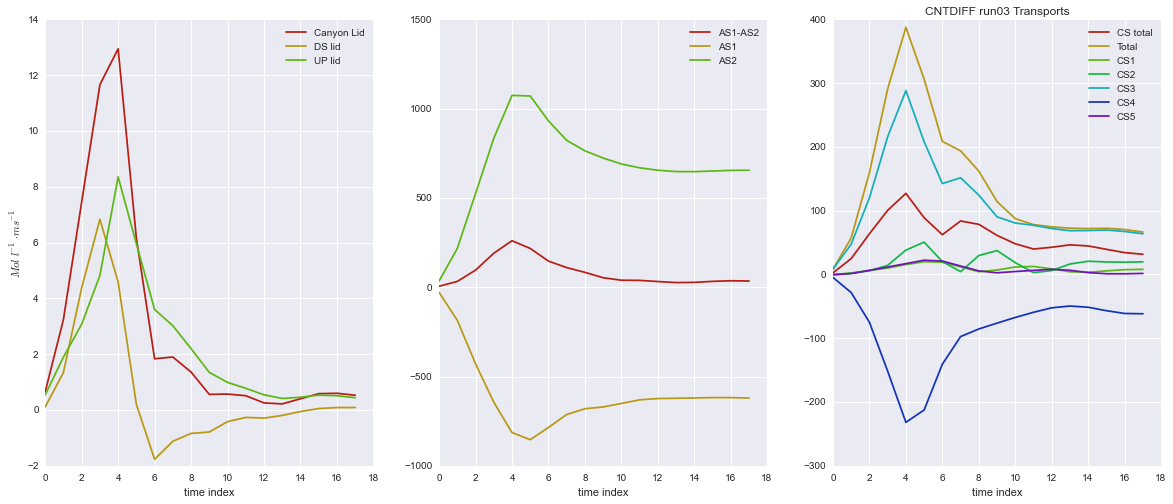

In [72]:

     
FluxV = np.sum(np.sum(WTRAC01[:,29,227:262,120:240],axis=2),axis=1)
FluxLid1 = np.sum(np.sum(WTRAC01[:,29,227:262,120:180],axis=2),axis=1)
FluxLid2 = np.sum(np.sum(WTRAC01[:,29,227:262,180:240],axis=2),axis=1)

FluxCS1 = np.sum(np.sum(VTRAC01[:,:29,227,:40],axis=1),axis=1)
FluxCS2 = np.sum(np.sum(VTRAC01[:,:29,227,40:120],axis=1),axis=1)
FluxCS3 = np.sum(np.sum(VTRAC01[:,:29,262,120:240],axis=1),axis=1)
FluxCS4 = np.sum(np.sum(VTRAC01[:,:29,227,240:320],axis=1),axis=1)
FluxCS5 = np.sum(np.sum(VTRAC01[:,:29,227,320:359],axis=1),axis=1)

FluxAS1 = np.sum(np.sum(UTRAC01[:,:29,227:262,120],axis=1),axis=1)
FluxAS2 = np.sum(np.sum(UTRAC01[:,:29,227:262,240],axis=1),axis=1)

figSize=(20,8)

unitsTr = '$Mol\ l^{-1}\cdot ms^{-1}$'

fig44 = plt.figure(figsize=figSize)

sns.set_palette(sns.hls_palette(8, l=.4, s=.8))

plt.subplot(1,3,1)
ax1 = plt.gca()
ax1.plot(FluxV,label = 'Canyon Lid')
ax1.plot(FluxLid1, label = 'DS lid')
ax1.plot(FluxLid2, label = 'UP lid')
plt.xlabel('time index')
plt.ylabel(unitsTr)


plt.subplot(1,3,2)
ax2 = plt.gca()
ax2.plot(-FluxAS1+FluxAS2, label = 'AS1-AS2')
ax2.plot(-FluxAS1,label = 'AS1')
ax2.plot(FluxAS2, label = 'AS2')
plt.xlabel('time index')

plt.subplot(1,3,3)
ax3 = plt.gca()
ax3.plot(FluxCS1+FluxCS2+FluxCS3+FluxCS4+FluxCS5, label = 'CS total')
ax3.plot(FluxCS1+FluxCS2+FluxCS3+FluxCS4+FluxCS5-FluxAS1+FluxAS2, label = 'Total')
ax3.plot(FluxCS1,label = 'CS1')
ax3.plot(FluxCS2, label = 'CS2')
ax3.plot(FluxCS3, label = 'CS3')
ax3.plot(FluxCS4, label = 'CS4')
ax3.plot(FluxCS5, label = 'CS5')
plt.xlabel('time index')



handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc=0)

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels, loc=0)


plt.title('CNTDIFF run03 Transports ')

        


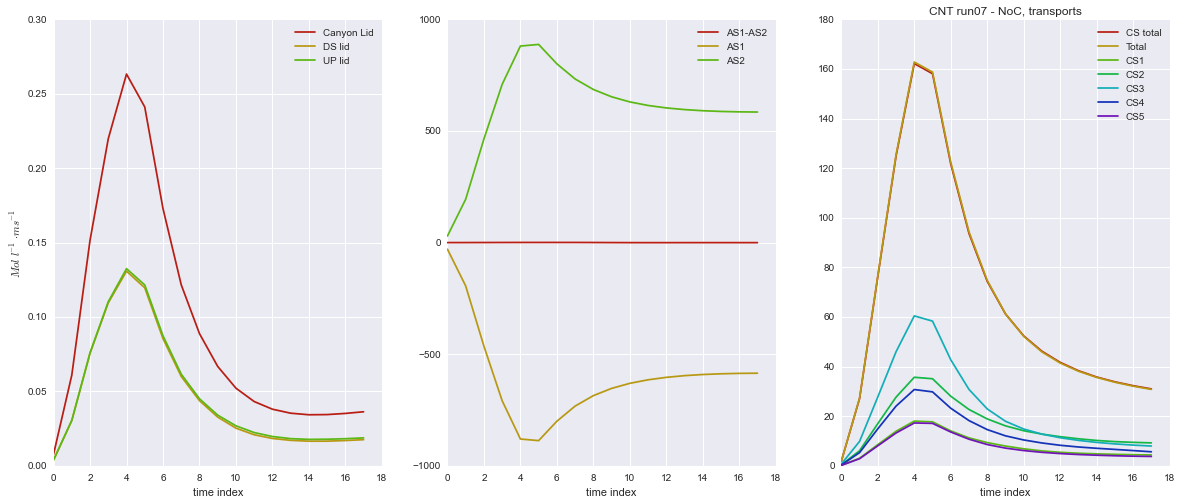

In [73]:
FluxVNoC = np.sum(np.sum(WTRAC01NoC[:,29,227:262,120:240],axis=2),axis=1)
FluxLid1NoC = np.sum(np.sum(WTRAC01NoC[:,29,227:262,120:180],axis=2),axis=1)
FluxLid2NoC = np.sum(np.sum(WTRAC01NoC[:,29,227:262,180:240],axis=2),axis=1)

FluxCS1NoC = np.sum(np.sum(VTRAC01NoC[:,:29,227,:40],axis=1),axis=1)
FluxCS2NoC = np.sum(np.sum(VTRAC01NoC[:,:29,227,40:120],axis=1),axis=1)
FluxCS3NoC = np.sum(np.sum(VTRAC01NoC[:,:29,262,120:240],axis=1),axis=1)
FluxCS4NoC = np.sum(np.sum(VTRAC01NoC[:,:29,227,240:320],axis=1),axis=1)
FluxCS5NoC = np.sum(np.sum(VTRAC01NoC[:,:29,227,320:359],axis=1),axis=1)

FluxAS1NoC = np.sum(np.sum(UTRAC01NoC[:,:29,227:262,120],axis=1),axis=1)
FluxAS2NoC = np.sum(np.sum(UTRAC01NoC[:,:29,227:262,240],axis=1),axis=1)

figSize=(20,8)

unitsTr = '$Mol\ l^{-1}\cdot ms^{-1}$'

fig44 = plt.figure(figsize=figSize)

sns.set_palette(sns.hls_palette(8, l=.4, s=.8))

plt.subplot(1,3,1)
ax1 = plt.gca()
ax1.plot(FluxVNoC,label = 'Canyon Lid')
ax1.plot(FluxLid1NoC, label = 'DS lid')
ax1.plot(FluxLid2NoC, label = 'UP lid')
plt.xlabel('time index')
plt.ylabel(unitsTr)


plt.subplot(1,3,2)
ax2 = plt.gca()
ax2.plot(-FluxAS1NoC+FluxAS2NoC, label = 'AS1-AS2')
ax2.plot(-FluxAS1NoC,label = 'AS1')
ax2.plot(FluxAS2NoC, label = 'AS2')
plt.xlabel('time index')

plt.subplot(1,3,3)
ax3 = plt.gca()
ax3.plot(FluxCS1NoC+FluxCS2NoC+FluxCS3NoC+FluxCS4NoC+FluxCS5NoC, label = 'CS total')
ax3.plot(FluxCS1NoC+FluxCS2NoC+FluxCS3NoC+FluxCS4NoC+FluxCS5NoC-FluxAS1NoC+FluxAS2NoC, label = 'Total')
ax3.plot(FluxCS1NoC,label = 'CS1')
ax3.plot(FluxCS2NoC, label = 'CS2')
ax3.plot(FluxCS3NoC, label = 'CS3')
ax3.plot(FluxCS4NoC, label = 'CS4')
ax3.plot(FluxCS5NoC, label = 'CS5')
plt.xlabel('time index')



handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc=0)

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels, loc=0)


plt.title('CNT run07 - NoC, transports')


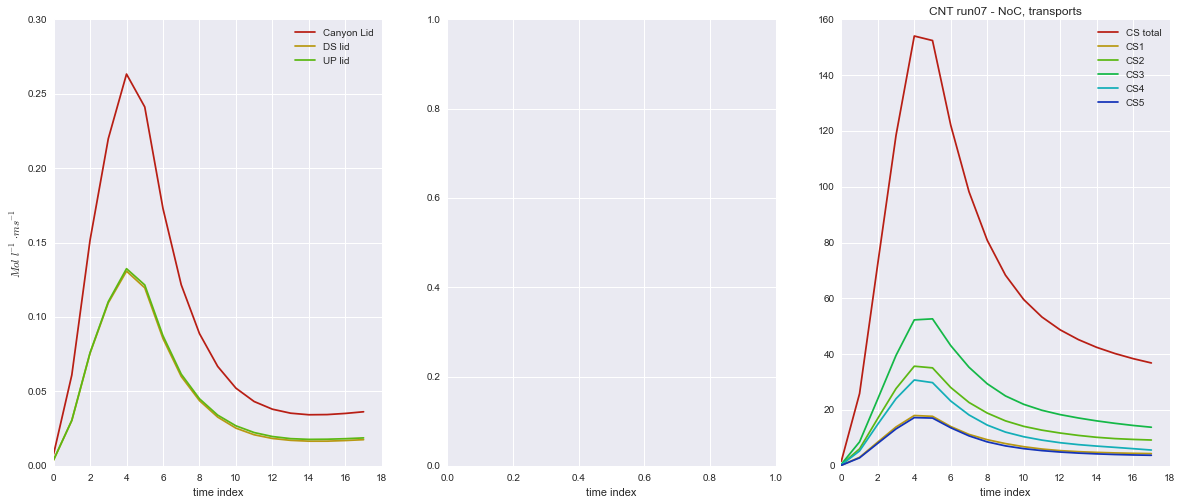

In [75]:
FluxVNoC = np.sum(np.sum(WTRAC01NoC[:,29,227:262,120:240],axis=2),axis=1)
FluxLid1NoC = np.sum(np.sum(WTRAC01NoC[:,29,227:262,120:180],axis=2),axis=1)
FluxLid2NoC = np.sum(np.sum(WTRAC01NoC[:,29,227:262,180:240],axis=2),axis=1)

FluxCS1NoC = np.sum(np.sum(VTRAC01NoC[:,:29,227,:40],axis=1),axis=1)
FluxCS2NoC = np.sum(np.sum(VTRAC01NoC[:,:29,227,40:120],axis=1),axis=1)
FluxCS3NoC = np.sum(np.sum(VTRAC01NoC[:,:29,227,120:240],axis=1),axis=1)
FluxCS4NoC = np.sum(np.sum(VTRAC01NoC[:,:29,227,240:320],axis=1),axis=1)
FluxCS5NoC = np.sum(np.sum(VTRAC01NoC[:,:29,227,320:359],axis=1),axis=1)

figSize=(20,8)

unitsTr = '$Mol\ l^{-1}\cdot ms^{-1}$'

fig44 = plt.figure(figsize=figSize)

sns.set_palette(sns.hls_palette(8, l=.4, s=.8))

plt.subplot(1,3,1)
ax1 = plt.gca()
ax1.plot(FluxVNoC,label = 'Canyon Lid')
ax1.plot(FluxLid1NoC, label = 'DS lid')
ax1.plot(FluxLid2NoC, label = 'UP lid')
plt.xlabel('time index')
plt.ylabel(unitsTr)


plt.subplot(1,3,2)
ax2 = plt.gca()

plt.xlabel('time index')

plt.subplot(1,3,3)
ax3 = plt.gca()
ax3.plot(FluxCS1NoC+FluxCS2NoC+FluxCS3NoC+FluxCS4NoC+FluxCS5NoC, label = 'CS total')
ax3.plot(FluxCS1NoC,label = 'CS1')
ax3.plot(FluxCS2NoC, label = 'CS2')
ax3.plot(FluxCS3NoC, label = 'CS3')
ax3.plot(FluxCS4NoC, label = 'CS4')
ax3.plot(FluxCS5NoC, label = 'CS5')
plt.xlabel('time index')



handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels, loc=0)


plt.title('CNT run07 - NoC, transports')


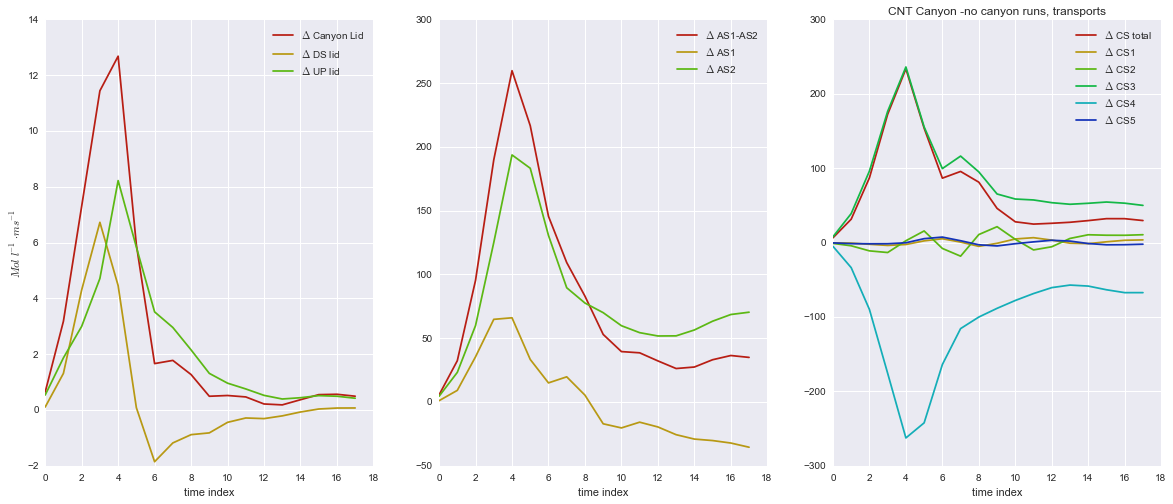

In [76]:
figSize=(20,8)

unitsTr = '$Mol\ l^{-1}\cdot ms^{-1}$'

fig44 = plt.figure(figsize=figSize)

sns.set_palette(sns.hls_palette(8, l=.4, s=.8))

plt.subplot(1,3,1)
ax1 = plt.gca()
ax1.plot(FluxV-FluxVNoC,label = '$\Delta$ Canyon Lid ')
ax1.plot(FluxLid1-FluxLid1NoC, label = '$\Delta$ DS lid')
ax1.plot(FluxLid2-FluxLid2NoC, label = '$\Delta$ UP lid')
plt.xlabel('time index')
plt.ylabel(unitsTr)


plt.subplot(1,3,2)
ax2 = plt.gca()
ax2.plot((-FluxAS1+FluxAS2)-(-FluxAS1NoC+FluxAS2NoC), label = '$\Delta$ AS1-AS2')
ax2.plot(-FluxAS1-(-FluxAS1NoC),label = '$\Delta$ AS1')
ax2.plot(FluxAS2-FluxAS2NoC, label = '$\Delta$ AS2')
plt.xlabel('time index')

plt.subplot(1,3,3)
ax3 = plt.gca()
ax3.plot((FluxCS1+FluxCS2+FluxCS3+FluxCS4+FluxCS5-FluxAS1+FluxAS2)-(FluxCS1NoC+FluxCS2NoC+FluxCS3NoC+FluxCS4NoC+FluxCS5NoC), label = '$\Delta$ CS total')
ax3.plot(FluxCS1-FluxCS1NoC,label = '$\Delta$ CS1')
ax3.plot(FluxCS2-FluxCS2NoC, label = '$\Delta$ CS2')
ax3.plot(FluxCS3-FluxCS3NoC, label = '$\Delta$ CS3')
ax3.plot(FluxCS4-FluxCS4NoC, label = '$\Delta$ CS4')
ax3.plot(FluxCS5-FluxCS5NoC, label = '$\Delta$ CS5')
plt.xlabel('time index')



handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc=0)

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels, loc=0)


plt.title('CNT Canyon -no canyon runs, transports')
